# Solving the 1-D Eigenvalue Equation  
$$ -\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi = E \psi $$  
## Reduction to dimensionless form  
 Assume natural length scale $a_0$. Let $x=a_0 y$. Substituting gives  
 $$ -\frac{\hbar^2}{2ma_0^2} \frac{d^2\psi}{dy^2} + V(x)\psi = E \psi $$  
 Use $E_0 = \hbar^2/2ma_0^2$ as a natural energy scale. Dividing throughout by $E_0$ gives  
  $$ -\frac{d^2\psi}{dy^2} + U(y)\psi = \epsilon \psi $$  
  where $U(y)=V(a_0 y)/E_0$ and $\epsilon=E/E_0$. The wavefunction satisfies the constraint  
  $$ \int dx |\psi|^2 = 1 $$.  
  We define a dimensionless wavefunction $\phi = \sqrt{a_0}\times \psi$. This 
  satisfies  
  $$ \int dy |\phi|^2 = 1 $$.
  
## Discretization  
We assume that $x \in [-L,L]$. Then, $y \in [-\tilde{L},\tilde{L}]$ where $\tilde{L}=L/l_0$.  
Divide the interval $[-\tilde{L},\tilde{L}]$ into $N$ segments with lattice points labelled by an 
integer $i$ such that $y_i = i\times \Delta$ where $\Delta = 2\tilde{L}/N$. Using the symmetric difference for the 
second derivative in the eigenvalue equation gives (at $y_i$)  
$$-\frac{1}{\Delta^2}\left(\phi_{i+1}-2\phi_i+\phi_{i-1}\right) + U_i \phi_i = \epsilon \phi_i $$  
This equation can be cast in the matrix form  
$$H \phi = \epsilon \phi $$
where the matrix $H$ has elements  
$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  
At this point, the eigenvalues and eigenvectors of $H$ can be determined using numpy.  
The normalization constraint on the eigenvectors $\phi$ is  
 $$ \int dy |\phi|^2 = 1 $$  
 which, in discrete form, reduces to
 $$ \Delta \sum_i |\phi_i|^2 = 1 $$

## Example: Harmonic Oscillator

$$V(x) =  \begin{cases} 
      -V_{o}& |x|\leq a \\
      0 & otherwise\\
   \end{cases}
$$ 
The natural energy scale is $E_0 = \frac{\hbar^2}{2 m a_0^2} $. The associated length scale is $a_0 = 2$${A^0}$  . The dimensionless eigenvalue equation is  
$$-\frac{d^2\phi}{dy^2} + U(y)\phi = \epsilon \phi $$ 

In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
delta = 0.01
L = 3. 
N = 300 # No. of lattice points is 2N+1
x = np.arange(-3.,3.+delta,delta)
a = 2*10**-10 # in m
hbar=(6.6*10**(-34))/(2*np.pi) #in Joules
m = 9.1*10**-31 # in kg
V_0 = 40 #in eV
ev = 1.6*10**(-19)
E_0 = e = hbar*hbar/(2*m*a*a*ev) #in eV
U = V_0/E_0 # dimensionless potential


In [3]:
def kronecker(i,j):
    return 1 if i==j else 0
def V(z): #potential well defined
    return -40/E_0 if abs(z) <=1 else 0.0

def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [4]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [5]:
potential = np.array([V(delta*i)*E_0 for i in range(-N,N+1)])

In [6]:
psi_0 , psi_1 = H_eigenvectors[:,0] , H_eigenvectors[:,1] # eigenvectors corresponding to ground and first excited state respectively

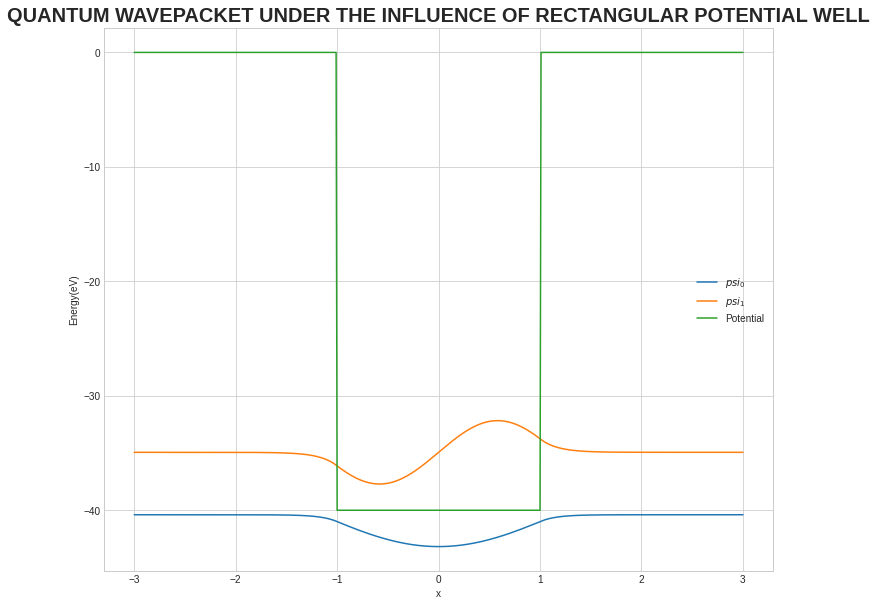

In [14]:
plt.figure(figsize=(12,10))
plt.plot(x, 30*(-psi_0) + H_eigenvalues[0], label="$psi_0$")
plt.plot(x, 30*(-psi_1) + H_eigenvalues[1], label ="$psi_1$")
plt.plot(x, potential, label="Potential")

plt.xlabel('x')
plt.ylabel('Energy(eV)')
plt.title('QUANTUM WAVEPACKET UNDER THE INFLUENCE OF RECTANGULAR POTENTIAL WELL',fontweight='bold',size='20')
plt.legend();

In [8]:
np.dot(psi_0.conj().T, psi_0) # Normalization check

0.9999999999999999

In [9]:
E0 , E1 = H_eigenvalues[0] , H_eigenvalues[1] #DIMENSIONLESS GROUND AND FIRST EXCITED ENERGY STATES RESPECTIVELY
print(E0,E1)

-40.39299246348143 -34.93945809979993


In [10]:
E0 , E1 = E0 * e , E1 * e

In [11]:
print(E0,E1) #GROUND AND FIRST EXCITED ENERGY STATES RESPECTIVELY IN eV

-38.26333331131307 -33.09732826053849


In [12]:
print(psi_0,psi_1) #GROUND AND FIRST EXCITED EIGEN VECTORS RESPECTIVELY 

[7.19964379e-09 1.44283693e-08 2.17153750e-08 2.90900952e-08
 3.65823189e-08 4.42223097e-08 5.20409277e-08 6.00697541e-08
 6.83412200e-08 7.68887362e-08 8.57468293e-08 9.49512790e-08
 1.04539265e-07 1.14549516e-07 1.25022468e-07 1.36000422e-07
 1.47527723e-07 1.59650932e-07 1.72419020e-07 1.85883559e-07
 2.00098937e-07 2.15122575e-07 2.31015159e-07 2.47840881e-07
 2.65667708e-07 2.84567646e-07 3.04617038e-07 3.25896869e-07
 3.48493095e-07 3.72496989e-07 3.98005510e-07 4.25121694e-07
 4.53955073e-07 4.84622112e-07 5.17246684e-07 5.51960572e-07
 5.88903993e-07 6.28226173e-07 6.70085946e-07 7.14652397e-07
 7.62105543e-07 8.12637062e-07 8.66451065e-07 9.23764924e-07
 9.84810146e-07 1.04983331e-06 1.11909706e-06 1.19288119e-06
 1.27148371e-06 1.35522214e-06 1.44443472e-06 1.53948180e-06
 1.64074732e-06 1.74864030e-06 1.86359656e-06 1.98608044e-06
 2.11658670e-06 2.25564248e-06 2.40380948e-06 2.56168619e-06
 2.72991031e-06 2.90916136e-06 3.10016339e-06 3.30368789e-06
 3.52055699e-06 3.751646